<a href="https://colab.research.google.com/github/viraatdas/Neural-Network-Purdue-Workshop/blob/final(5)/Basic_Image_Classification_Using_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print ("wusssssuuuupppp")

Import the required libraries

In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


Import the MNIST Fashion dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


https://github.com/zalandoresearch/fashion-mnist

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Different properties of this dataset

In [0]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

Preprocess the data

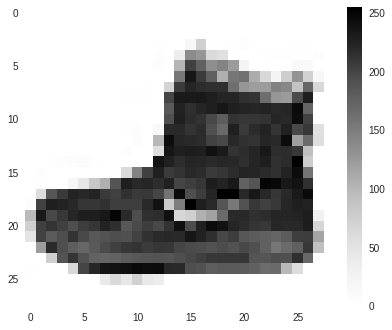

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Downscaling and standardizing the data

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Sanity check for the images

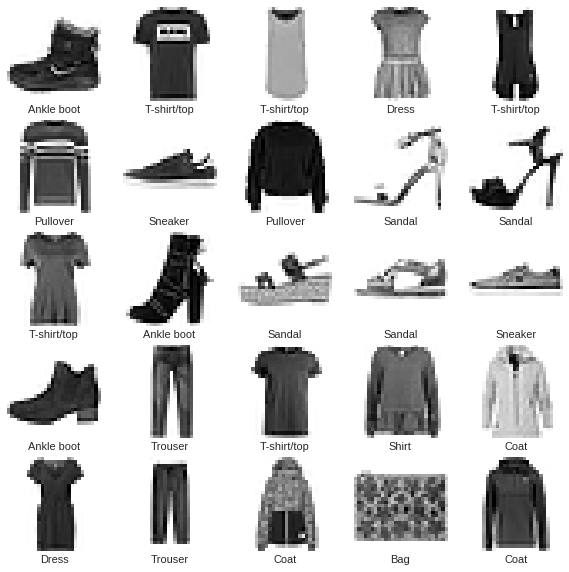

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**BUILD MODEL**

Setup the layers

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


Compile the function

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

THE COOL PART

**TRAIN THE MODEL**

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4947 - acc: 0.8257
Epoch 2/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3755 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3368 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3125 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2925 - acc: 0.8917


**Evaluate accuracy**



In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3490 - acc: 0.8770
Test accuracy: 0.877


The even cooler part!

**Make predictions**

In [0]:
predictions = model.predict(test_images)
predictions[0]

array([4.4099278e-07, 4.0870747e-09, 4.7766548e-08, 5.7861027e-09,
       1.8580597e-07, 2.4433777e-02, 8.5823878e-08, 2.7143374e-02,
       2.7748831e-06, 9.4841927e-01], dtype=float32)

Let's check out the full set of 10 channels

In [0]:
np.argmax(predictions[0])
test_labels[0]
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Prediction array for images

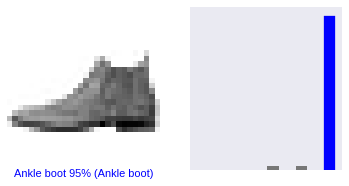

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


Another prediction array

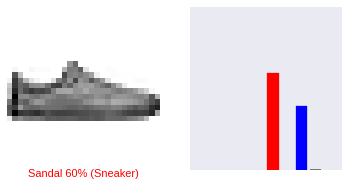

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

Compare accuracies of code

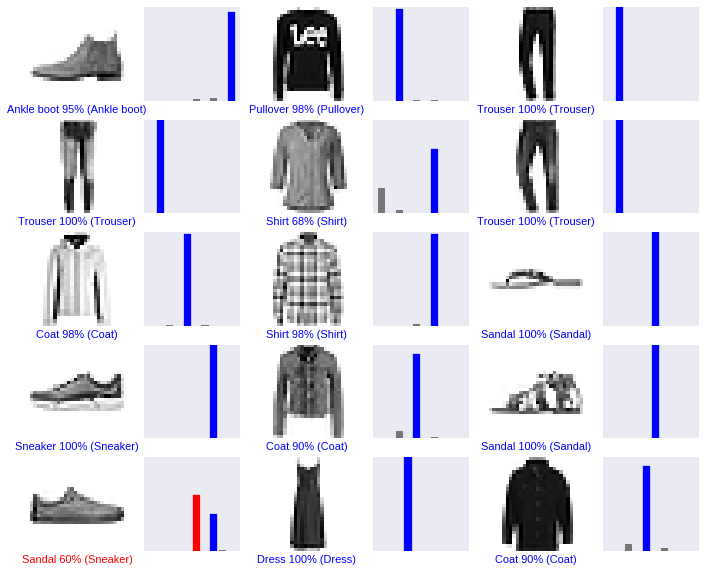

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
  

**Time to make predictions for the image**

In [65]:
img = test_images[0]


print (img.shape) #we pick an image

(28, 28)


In [66]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)



(1, 28, 28)


Actually predict the image now

In [67]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.4099403e-07 4.0870667e-09 4.7766548e-08 5.7861138e-09 1.8580562e-07
  2.4433803e-02 8.5823878e-08 2.7143382e-02 2.7748883e-06 9.4841927e-01]]


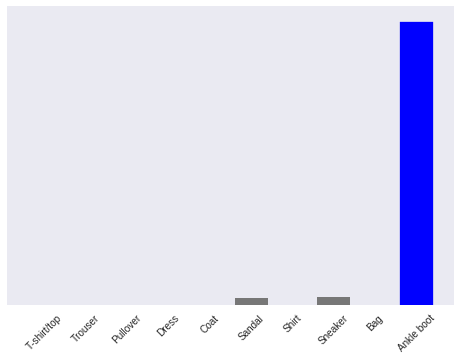

In [68]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

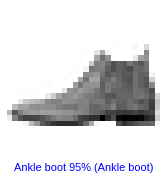

In [69]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_single, test_labels, test_images)